# ARMA models: ARIMA, SARIMA, SARIMAX

### Notes

* The ARMA model family comprises several varieties: 
    * ARMA: Autoregressive Moving Average
    * ARIMA: Autoregressive Integrated Moving Average ( = ARMA + trends)
    * SARIMA: Seasonal Autoregressive Integrated Moving Average
    * SARIMAX: Seasonal Autoregressive Moving Average with Exogenous variables (=features)

* ARMA, ARIMA, and SARIMA are univariate models, whereas SARIMAX is a multivariate model which requires forecasted features as inputs for forecasting.
* The number of periods per season is limited in SARIMA and SARIMAX models. They can capture weekly seasonality with daily data (7 periods per season) or yearly seasonality with monthly data (12 periods per season), but they could not, for instance, capture yearly seasonality using daily data (365 periods per season). Yearly seasonality with monthly data (52 periods per season) is usually borderline. 


### References

* https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import tshelper as h

plt.style.use("seaborn-whitegrid")

## Load and prepare data

In [2]:
# Load data
df = pd.read_csv("data/catalog_seasfac.csv",
                 usecols=["date", "men", "women", "jewel", "mail", "page", "phone", "print", "service"],
                 index_col = "date")

# Convert index to PeriodIndex
df.index = pd.to_datetime(df.index).to_period("M")

# Define features and target
y = df["women"]
X = df[["mail", "page", "phone", "print", "service"]]

# Show features and target
X.join(y).head()

,mail,page,phone,print,service,women
date,,,,,,
1989-01,7978,73,34,22294.48,20,16578.93
1989-02,8290,88,29,27426.47,20,18236.13
1989-03,8029,65,24,27978.66,26,43393.55
1989-04,7752,85,20,28949.65,22,30908.49
1989-05,8685,74,17,22642.27,21,28701.58


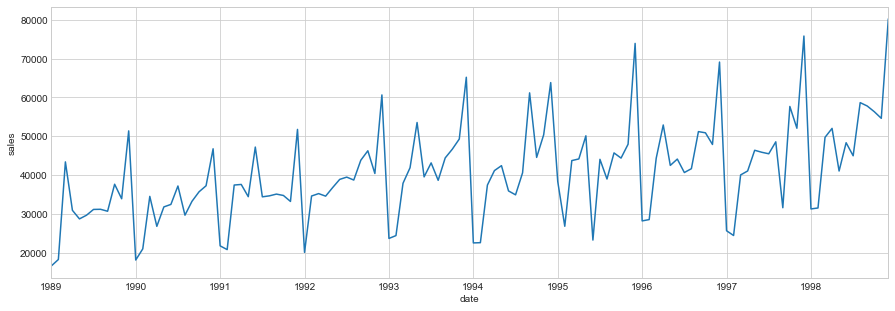

In [3]:
# Visualize target
h.plot_series(y, xlabel=y.index.name, ylabel="sales")

## Train/test split

In [4]:
X_train = X[:"1997"]
y_train = y[:"1997"]
X_test = X["1998"]
y_test = y["1998"]

## ARIMA model

#### ARIMA(2,2,2):
* 2 autoregressive terms, 2 times integrated, 2 moving average terms

In [7]:
# Instantiate and train model
model = SARIMAX(y_train, exog=None, order=(2,2,2))
model = model.fit(maxiter=100)

# Model statistics
model.summary()

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  women   No. Observations:                  108
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1144.133
Date:                Sat, 16 Nov 2019   AIC                           2298.266
Time:                        16:25:50   BIC                           2311.583
Sample:                    01-31-1989   HQIC                          2303.664
                         - 12-31-1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1373      0.166      0.825      0.409      -0.189       0.463
ar.L2         -0.0850      0.188     -0.452      0.651      -0.453       0.283
ma.L1         -1.9665      0.186    -10.544      0.000      -2.332      -1.601
ma.L2          0.9726      0.186      5.234      0.000       0.608       1.337
sigma2      1.761e+08   1.95e-09   9.02e+16      0.000    1.76e+08    1.76e+08
===================================================================================
Ljung-Box (Q):                      135.09   Jarque-Bera (JB):                 6.18
Prob(Q):                              0.00   Prob(JB):                         0.05
Heteroskedasticity (H):               1.34   Skew:                             0.38
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.43e+32. Standard errors may be unstable.
"""

R-squared:               0.0616
Root mean squared error: 12517.0976
Mean absolute error:     9601.3455


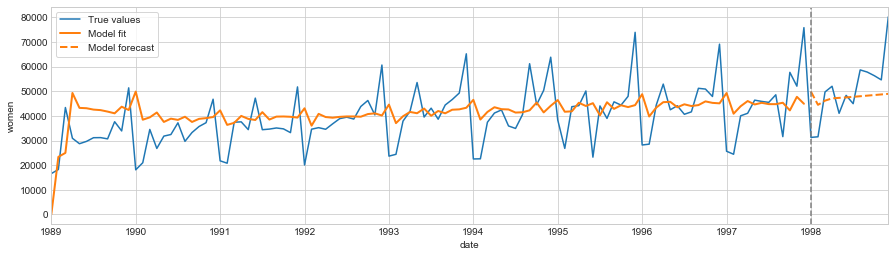

In [8]:
# Predict and forecast
y_pred = model.predict()
y_fcst = model.forecast(12)

# Evaluate model on test set
h.eval_model(y_test, y_fcst)

# Visualize fit and forecast
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

## SARIMA model

#### SARIMA(1,1,1)(2,1,1)12:
* 1 autoregressive term, 1 times integrated, 1 moving average term 
* 2 seasonal autoregressive terms, 1 times seasonally integrated, 1 seasonal moving average term
* 12 periods per season (12 months per year)

In [9]:
# Instantiate and train model
model = SARIMAX(y_train, exog=None, order=(1,1,1), seasonal_order=(2,1,1,12))
model = model.fit(maxiter=100)

# Model statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              women   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -981.313
Date:                            Sat, 16 Nov 2019   AIC                           1974.627
Time:                                    16:25:53   BIC                           1989.950
Sample:                                01-31-1989   HQIC                          1980.819
                                     - 12-31-1997                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0287      0.155      0.186      0.853      -0.275       0.332
ma.L1         -0.6418      0.159     -4.045      0.000      -0.953      -0.331
ar.S.L12       0.0353      0.748      0.047      0.962      -1.431       1.501
ar.S.L24       0.1569      0.374      0.419      0.675      -0.577       0.890
ma.S.L12      -0.5364      0.725     -0.739      0.460      -1.958       0.885
sigma2       6.24e+07   5.46e-08   1.14e+15      0.000    6.24e+07    6.24e+07
===================================================================================
Ljung-Box (Q):                       40.91   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.43   Prob(JB):                         0.48
Heteroskedasticity (H):               1.34   Skew:                            -0.11
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.74e+30. Standard errors may be unstable.
"""

R-squared:               0.8380
Root mean squared error: 5605.6235
Mean absolute error:     4019.5251


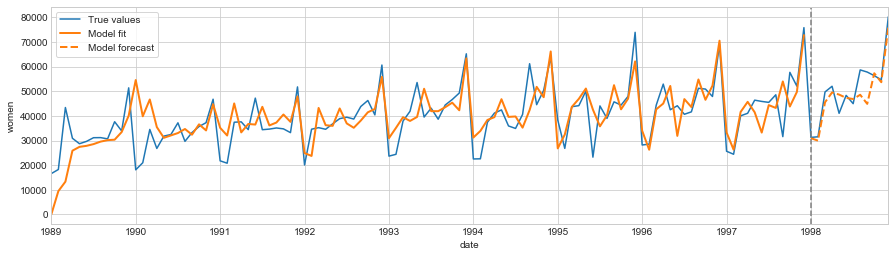

In [10]:
# Predict and forecast
y_pred = model.predict()
y_fcst = model.forecast(12)

# Evaluate model on test set
h.eval_model(y_test, y_fcst)

# Visualize fit and forecast
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

## SARIMAX model

#### SARIMAX(1,1,1)(2,1,1)12:
* 1 autoregressive term, 1 times integrated, 1 moving average term 
* 2 seasonal autoregressive terms, 1 times seasonally integrated, 1 seasonal moving average term
* 12 periods per season (12 months per year)
* Vector of exogenous features X

In [11]:
# Instantiate and train model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(2,1,1,12))
model = model.fit(maxiter=100)

# Model statistics
model.summary()

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              women   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -944.247
Date:                            Sat, 16 Nov 2019   AIC                           1910.494
Time:                                    16:26:04   BIC                           1938.586
Sample:                                01-31-1989   HQIC                          1921.845
                                     - 12-31-1997                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mail           1.9906      1.139      1.748      0.080      -0.241       4.222
page         -23.4230    106.857     -0.219      0.826    -232.858     186.012
phone         -1.0139    161.127     -0.006      0.995    -316.817     314.789
print          0.4484      0.270      1.662      0.096      -0.080       0.977
service      356.6707    196.480      1.815      0.069     -28.422     741.764
ar.L1          0.0056      0.376      0.015      0.988      -0.732       0.743
ma.L1         -0.9755      0.160     -6.089      0.000      -1.290      -0.662
ar.S.L12      -0.1512      0.789     -0.192      0.848      -1.697       1.395
ar.S.L24      -0.0631      0.545     -0.116      0.908      -1.131       1.005
ma.S.L12      -0.4682      0.794     -0.589      0.556      -2.025       1.089
sigma2      3.541e+07      0.002   2.32e+10      0.000    3.54e+07    3.54e+07
===================================================================================
Ljung-Box (Q):                       40.39   Jarque-Bera (JB):               191.83
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               2.76   Skew:                            -0.60
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.35e+26. Standard errors may be unstable.
"""

R-squared:               0.8993
Root mean squared error: 4221.5866
Mean absolute error:     2700.6545


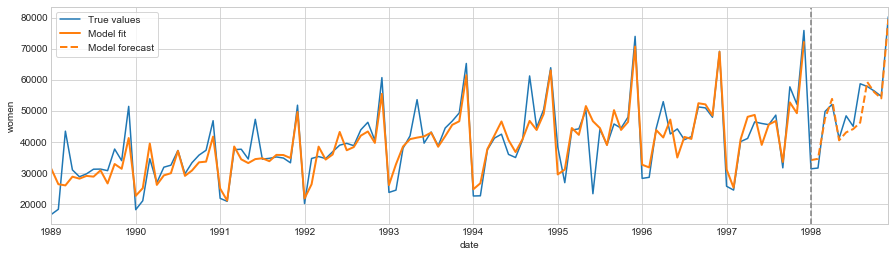

In [12]:
# Predict
y_pred = model.predict()

# "Forecast" features: Using test data here for the sake of simplicity
# In a real application features would have to be forecasted first!
X_fcst = X_test

# Forecast target
y_fcst = model.forecast(steps=12, exog=X_fcst)

# Evaluate model on test set
h.eval_model(y_test, y_fcst)

# Visualize fit and forecast
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

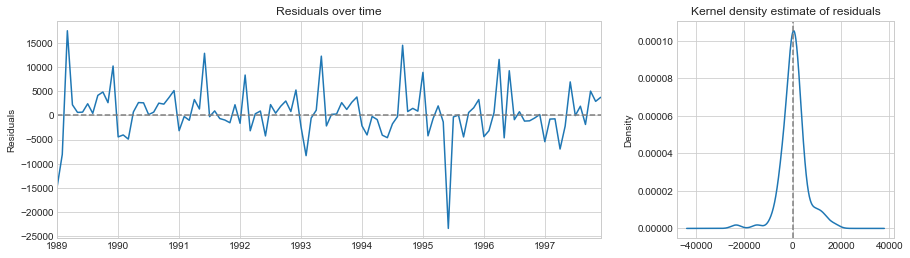

In [14]:
# Plot residuals
h.plot_residuals(y_train-y_pred)

# >> residuals are centered around 0

## Grid search for model parameters

<i>to be done</i>